In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from Simulator_new import Simulation

plt.rcParams.update({'font.size': 14})

data_loc = r'D:\Uni\Master\Mulitscale_methods\MD\Code\Data'
def dataloc(end: str):
    return rf'{data_loc}\{end}'

base_loc = r'D:\Uni\Master\Mulitscale_methods\MD\Tex\images'
def imloc(end: str):
    return rf'{base_loc}\{end}'

# 1

In [38]:
np.random.seed(584390)
result = Simulation.run(t=2e2, steps=int(2e7), particles=2, save_every=10, verlet_type='basic')
result.save(dataloc('1.npz'))

100% done


In [12]:
result = Simulation.read(dataloc('1.npz'))
index = np.searchsorted(result.save_times > 2e1, 0.5)
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

Kinetic std: 5.92e-02
Potential std: 5.92e-02
Energy std: 4.29e-06


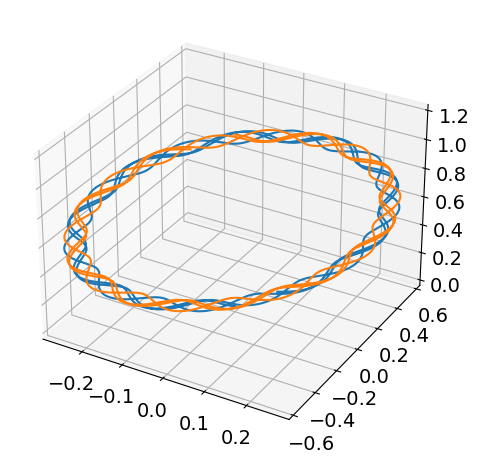

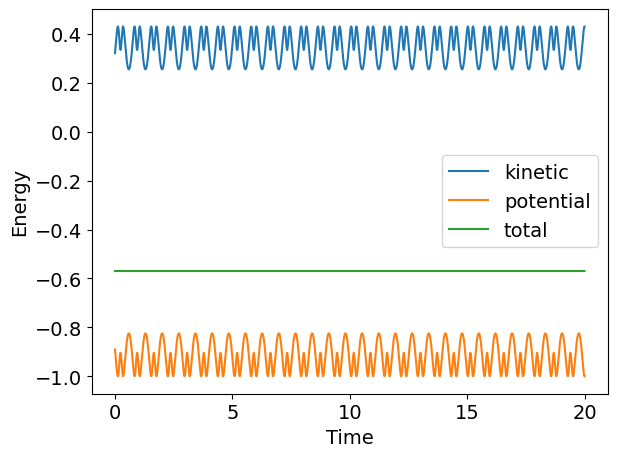

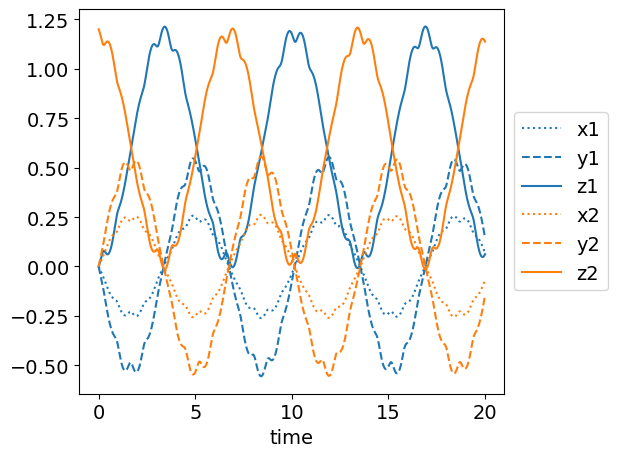

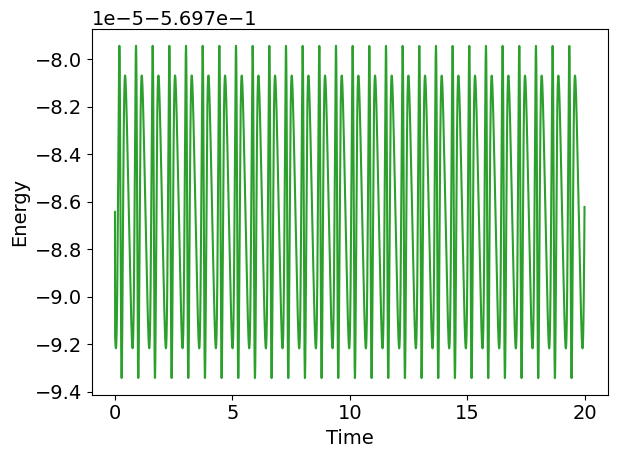

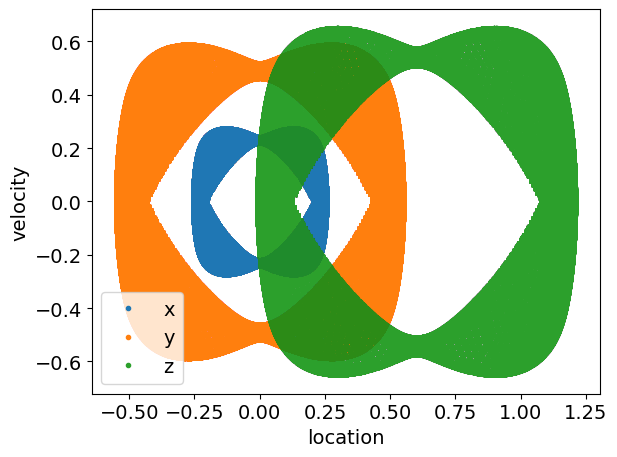

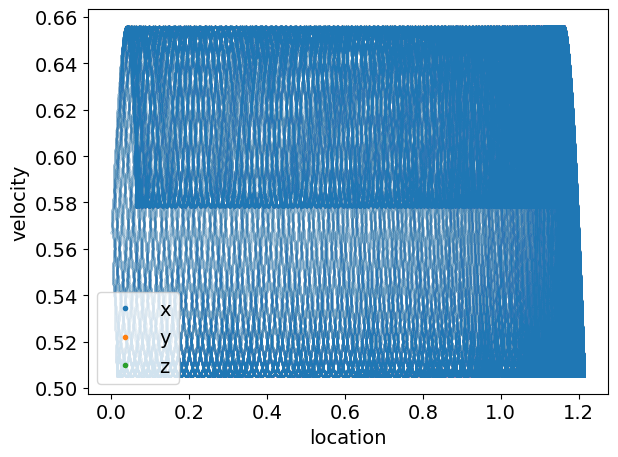

In [13]:
result.plot(stop=index)
plt.tight_layout()
plt.savefig(imloc('3_1_3Dplot.png'))

result.plot_energy(stop=index)
plt.tight_layout()
plt.savefig(imloc('3_1_energy.png'))
loc = result.total_particle_locations

plt.figure()
plt.plot(result.save_times[:index], loc[:index, 0, 0], 'C0', linestyle='dotted', label='x1')
plt.plot(result.save_times[:index], loc[:index, 0, 1], 'C0--', label='y1')
plt.plot(result.save_times[:index], loc[:index, 0, 2], 'C0-', label='z1')
plt.plot(result.save_times[:index], loc[:index, 1, 0], 'C1', linestyle='dotted', label='x2')
plt.plot(result.save_times[:index], loc[:index, 1, 1], 'C1--', label='y2')
plt.plot(result.save_times[:index], loc[:index, 1, 2], 'C1-', label='z2')
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('3_1_coordinates.png'))
plt.show()

plt.figure()
plt.plot(result.save_times[:index], result.total_energy[:index], 'C2-')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.tight_layout()
plt.savefig(imloc('3_1_totalenergy.png'))
plt.show()

plt.figure()
plt.scatter(result.total_particle_locations[:, 0, 0], result.total_particle_velocities[:, 0, 0], s=0.001)
plt.scatter(result.total_particle_locations[:, 0, 1], result.total_particle_velocities[:, 0, 1], s=0.001)
plt.scatter(result.total_particle_locations[:, 0, 2], result.total_particle_velocities[:, 0, 2], s=0.001)
plt.xlabel('location')
plt.ylabel('velocity')
lines = [mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C0'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C1'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C2')]
plt.legend(lines, ['x', 'y', 'z'], loc='lower left')
plt.tight_layout()
plt.savefig(imloc('3_1_poicare.png'))
plt.show()


r = (result.total_particle_locations[:, 0, 0]**2 + result.total_particle_locations[:, 0, 1]**2 + result.total_particle_locations[:, 0, 2]**2)**(1/2)
v = (result.total_particle_velocities[:, 0, 0]**2 + result.total_particle_velocities[:, 0, 1]**2 + result.total_particle_velocities[:, 0, 2]**2)**(1/2)
plt.figure()
plt.scatter(r, v, s=0.001)
plt.xlabel('location')
plt.ylabel('velocity')
lines = [mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C0'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C1'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C2')]
plt.legend(lines, ['x', 'y', 'z'], loc='lower left')
plt.tight_layout()
plt.savefig(imloc('3_1_poicare_2.png'))
plt.show()


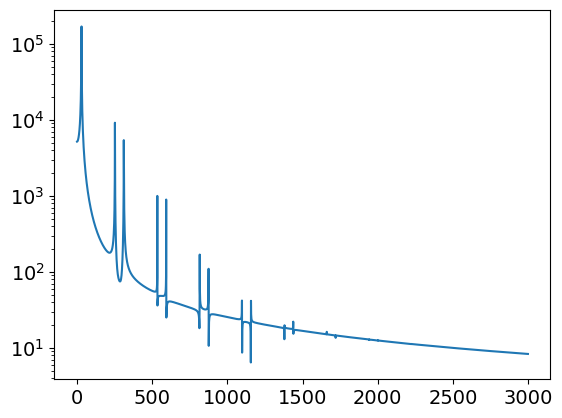

In [34]:
plt.figure()
plt.semilogy(np.abs(np.fft.fft(result.total_particle_locations[:, 0, 0])[:3000]))
plt.show()

# 2

In [17]:
np.random.seed(584390)
result = Simulation.run(t=1e2, steps=int(1e7), particles=3, save_every=10)
result.save(dataloc('2.npz'))

100% done


In [36]:
result = Simulation.read(dataloc('2.npz'))
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

Kinetic std: 3.41e-01
Potential std: 3.41e-01
Energy std: 2.38e-05


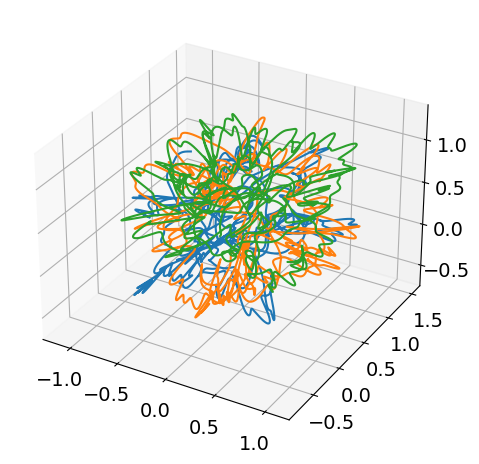

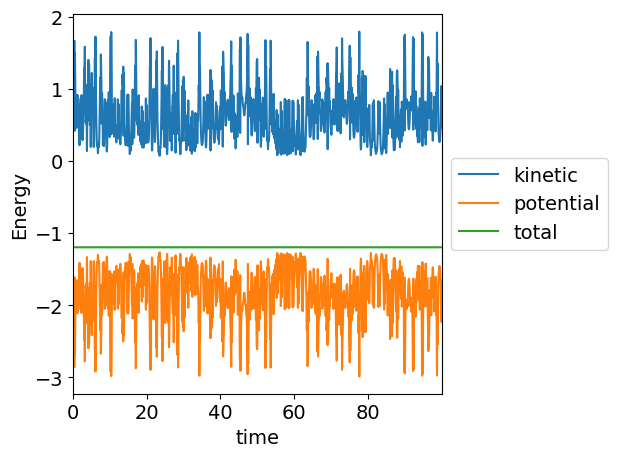

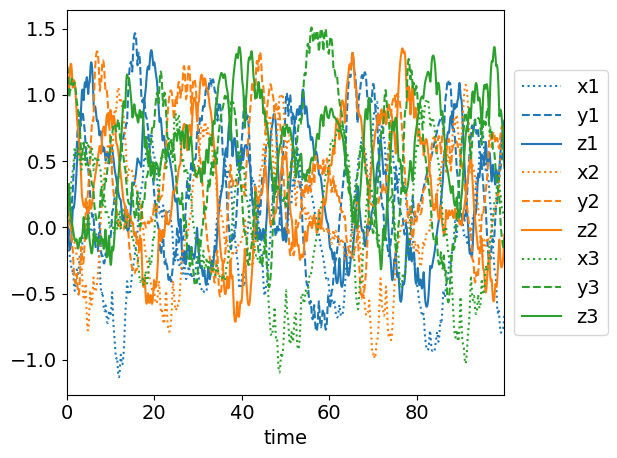

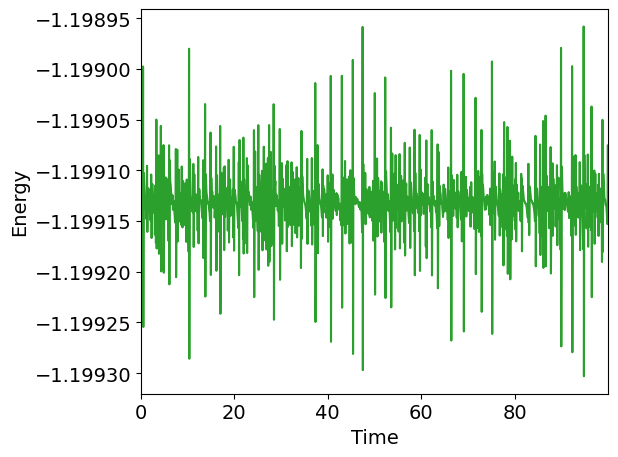

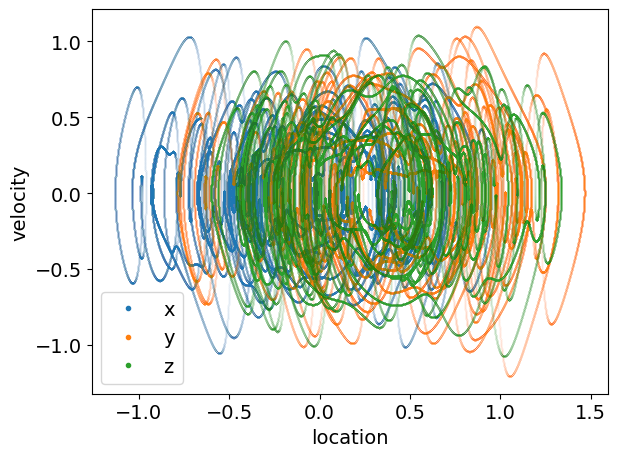

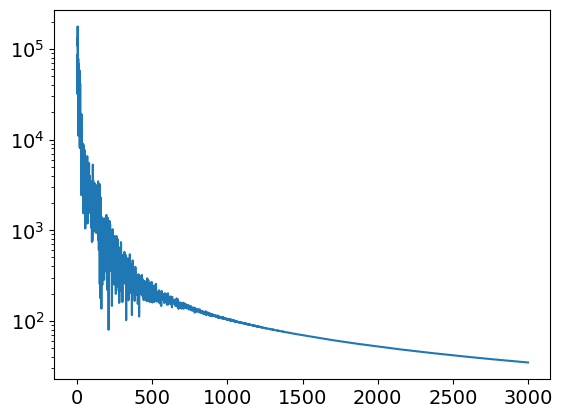

In [37]:
result.plot()
plt.tight_layout()
plt.savefig(imloc('3_2_3Dplot.png'))

result.plot_energy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(result.save_times[0], result.save_times[-1])
plt.tight_layout()
plt.savefig(imloc('3_2_energy.png'))
loc = result.total_particle_locations

plt.figure()
plt.plot(result.save_times, loc[:, 0, 0], 'C0', linestyle='dotted', label='x1')
plt.plot(result.save_times, loc[:, 0, 1], 'C0--', label='y1')
plt.plot(result.save_times, loc[:, 0, 2], 'C0-', label='z1')
plt.plot(result.save_times, loc[:, 1, 0], 'C1', linestyle='dotted', label='x2')
plt.plot(result.save_times, loc[:, 1, 1], 'C1--', label='y2')
plt.plot(result.save_times, loc[:, 1, 2], 'C1-', label='z2')
plt.plot(result.save_times, loc[:, 2, 0], 'C2', linestyle='dotted', label='x3')
plt.plot(result.save_times, loc[:, 2, 1], 'C2--', label='y3')
plt.plot(result.save_times, loc[:, 2, 2], 'C2-', label='z3')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('3_2_coordinates.png'))
plt.show()

plt.figure()
plt.plot(result.save_times, result.total_energy, 'C2-')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.tight_layout()
plt.savefig(imloc('3_2_totalenergy.png'))
plt.show()

plt.figure()
plt.scatter(result.total_particle_locations[:, 0, 0], result.total_particle_velocities[:, 0, 0], s=0.0001)
plt.scatter(result.total_particle_locations[:, 0, 1], result.total_particle_velocities[:, 0, 1], s=0.0001)
plt.scatter(result.total_particle_locations[:, 0, 2], result.total_particle_velocities[:, 0, 2], s=0.0001)
plt.xlabel('location')
plt.ylabel('velocity')
lines = [mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C0'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C1'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C2')]
plt.legend(lines, ['x', 'y', 'z'], loc='lower left')
plt.tight_layout()
plt.savefig(imloc('3_2_poicare.png'))
plt.show()

plt.figure()
plt.semilogy(np.abs(np.fft.fft(result.total_particle_locations[:, 0, 0])[:3000]))
plt.show()

# 4

In [2]:
np.random.seed(584390)
result = Simulation.run(t=1e2, steps=int(1e7), particles=3, save_every=10, verlet_type='basic')
result.save(dataloc('3_simple_verlet.npz'))

np.random.seed(584390)
result = Simulation.run(t=1e2, steps=int(1e7), particles=3, save_every=10, verlet_type='velocity')
result.save(dataloc('3_velocity_verlet.npz'))

100% done
100% done


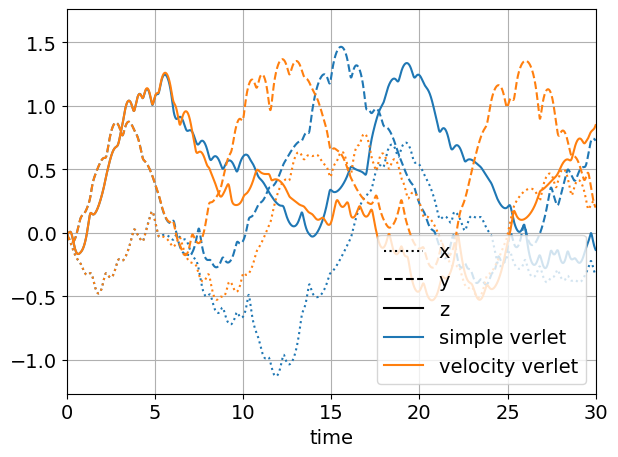

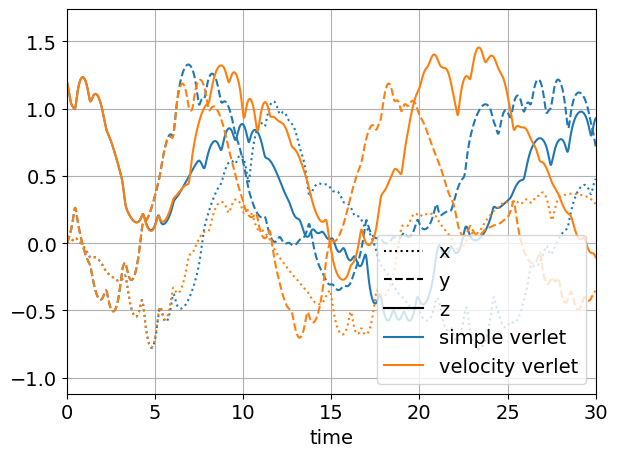

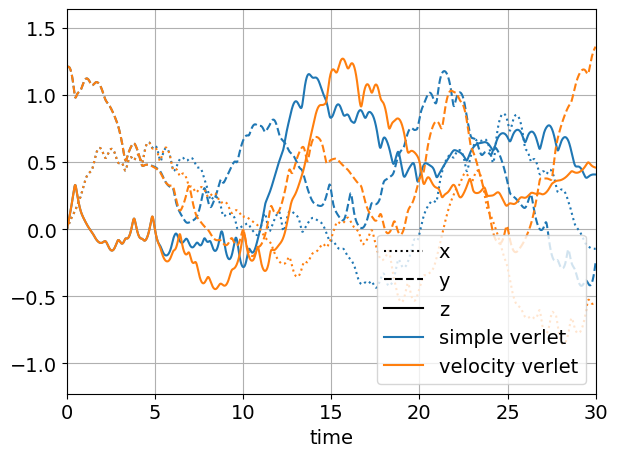

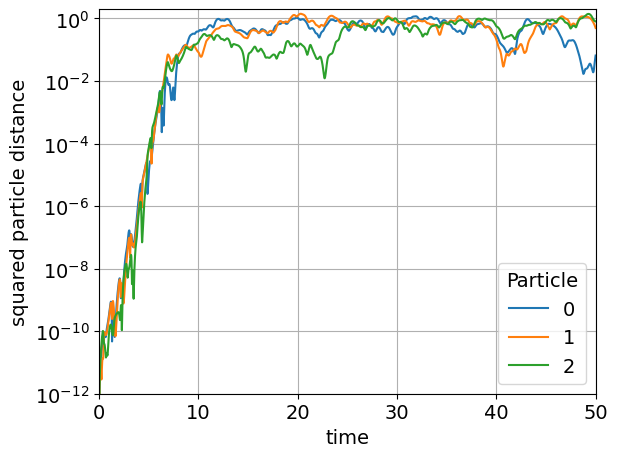

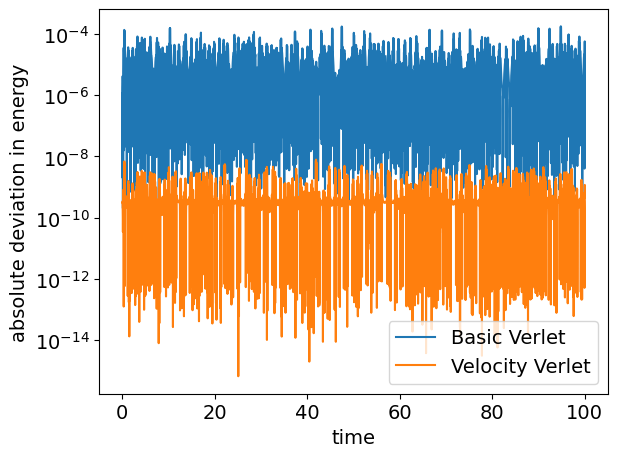

In [3]:
result_old = Simulation.read(dataloc('3_simple_verlet.npz'))
result_new = Simulation.read(dataloc('3_velocity_verlet.npz'))
time_range = (result_old.save_times[0], result_old.save_times[-1])

for i in range(3):
    plt.figure()
    plt.plot(result_old.save_times, result_old.total_particle_locations[:, i, 0], 'C0', linestyle='dotted')
    plt.plot(result_old.save_times, result_old.total_particle_locations[:, i, 1], 'C0', linestyle='dashed')
    plt.plot(result_old.save_times, result_old.total_particle_locations[:, i, 2], 'C0', linestyle='solid')
    plt.plot(result_new.save_times, result_new.total_particle_locations[:, i, 0], 'C1', linestyle='dotted')
    plt.plot(result_new.save_times, result_new.total_particle_locations[:, i, 1], 'C1', linestyle='dashed')
    plt.plot(result_new.save_times, result_new.total_particle_locations[:, i, 2], 'C1', linestyle='solid')

    lines = [mpl.lines.Line2D([0], [0], color='k', linestyle='dotted'), mpl.lines.Line2D([0], [0], color='k', linestyle='dashed'), mpl.lines.Line2D([0], [0], color='k', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C0', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C1', linestyle='solid')]
    plt.legend(lines, ['x', 'y', 'z', 'simple verlet', 'velocity verlet'], loc='lower right')
    plt.xlabel('time')
    plt.xlim(0, 30)
    plt.grid()
    plt.tight_layout()
    plt.savefig(imloc(f'3_3_coordinates_comparison_{i}.png'))
    plt.show()

plt.figure()
for i in range(3):
    values = np.average((result_old.total_particle_locations[:, i, :]-result_new.total_particle_locations[:, i, :])**2, axis=1)
    plt.semilogy(result_old.save_times, values, label=f'{i}')
plt.grid()
plt.legend(title='Particle')
plt.xlabel('time')
plt.ylabel('squared particle distance')
plt.ylim(1e-12, 2e0)
plt.xlim(0, 50)
plt.tight_layout()
plt.savefig(imloc(r'3_3_particle_distance.png'))
plt.show()

plt.figure()
plt.semilogy(result_old.save_times[1:], abs(result_old.total_energy[1:]-np.average(result_old.total_energy[1:])), label='Basic Verlet')
plt.semilogy(result_new.save_times[1:], abs(result_new.total_energy[1:]-np.average(result_new.total_energy[1:])), label='Velocity Verlet')
plt.xlabel('time')
plt.ylabel('absolute deviation in energy')
plt.legend()
plt.tight_layout()
plt.savefig(imloc(r'3_3_energy_deviation.png'))
plt.show()

In [66]:
mask = result_old.save_times > 20

print('Basic Verlet:')
print(f'Kinetic energy: {np.average(result_old.kinetic[mask]):.3e} ± {np.std(result_old.kinetic[mask]):.3e}')
print(f'Total energy: {np.average(result_old.total_energy[mask]):.3e} ± {np.std(result_old.total_energy[mask]):.3e}')

print('Velocity Verlet:')
print(f'Kinetic energy: {np.average(result_new.kinetic[mask]):.3e} ± {np.std(result_new.kinetic[mask]):.3e}')
print(f'Total energy: {np.average(result_new.total_energy[mask]):.3e} ± {np.std(result_new.total_energy[mask]):.3e}')

Basic Verlet:
Kinetic energy: 6.856e-01 ± 3.452e-01
Total energy: -1.199e+00 ± 8.301e-05
Velocity Verlet:
Kinetic energy: 6.489e-01 ± 3.273e-01
Total energy: -1.199e+00 ± 1.213e-08


# 5 & 6

In [133]:
def extract_data(loc, measure_start, particles):
    files = []
    for file in os.listdir(dataloc('')):
        parts = file.split('_')
        if not file.startswith(loc):
            continue
        if not (int(parts[4][1:])==particles):
            continue
        files.append(file)

    times = set([])
    res_dict = {}
    for index, file in enumerate(files):
        sim = Simulation.read(dataloc(file))
        line = file.split('_')
        seed = int(line[6].split('.')[0][2:])
        times.add(int(line[3][1:]))
        mask = sim.save_times > measure_start
        values = np.average(np.abs((sim.total_energy[mask]/np.average(sim.total_energy[mask]) - 1)))
        try:
            res_dict[seed][100/sim.steps] = values
        except KeyError:
            res_dict[seed] = {100/sim.steps: values}
        if res_dict[seed][100/sim.steps] == 0:
            print(f'\rzero for {sim.steps} steps\t\t')
        print(f'\r{100*(index+1)/len(files):.2f}% done', end='')
    print('')

    if len(times) != 1:
        raise NotImplementedError('Simulations with different lengths')
    return pd.DataFrame(res_dict).sort_index()

def fit(data_df: pd.DataFrame, max_dt=np.inf, min_dt=0.0):
    data_df = data_df[data_df.sum(axis=1) > 0]
    seeds = data_df.columns
    values = np.zeros((len(seeds), 4))
    fit_result = pd.DataFrame(values, index=seeds, columns=['a', 'a_err', 'b', 'b_err'])
    dt = data_df.index.to_numpy()
    mask = (min_dt < dt) & (dt < max_dt)
    dt = dt[mask]
    for seed in seeds:
        series = data_df[seed].to_numpy()[mask]
        nan_mask = ~np.isnan(series)
        fit, cov = np.polyfit(np.log10(dt[nan_mask]), np.log10(series[nan_mask]), 1, cov=True)
        fit_result.loc[seed] = [fit[0], np.sqrt(cov[0,0]), fit[1], np.sqrt(cov[0,0])]
    x, y = np.repeat(dt, len(seeds)), data_df.to_numpy()[mask].flatten()
    nan_mask = ~np.isnan(y)
    fit, cov = np.polyfit(np.log10(x[nan_mask]), np.log10(y[nan_mask]), 1, cov=True)
    # print(fit)
    # return fit_result
    # print(cov)
    values = np.array([fit[0], np.sqrt(cov[0,0]), fit[1], np.sqrt(cov[0,0])]).reshape(1, 4)
    total = pd.DataFrame(values, index=['total'], columns=['a', 'a_err', 'b', 'b_err'])
    return pd.concat([fit_result, total])

In [135]:
data_euler_3 = extract_data('5_deltaE_veuler_t100_p3', 20, 3)
data_basic_3 = extract_data('5_deltaE_vbasic_t100_p3', 20, 3)
data_velocity_3 = extract_data('5_deltaE_vvelocity_t100_p3', 20, 3)

zero for 158 steps		
zero for 251 steps		
zero for 251 steps		
zero for 630 steps		
100.00% done
100.00% done
zero for 251 steps		
zero for 251 steps		
zero for 251 steps		
zero for 251 steps		
zero for 398 steps		
zero for 630 steps		
zero for 630 steps		
100.00% done


In [136]:
max_dt = 0.03
min_dt = 1e-5
fit_euler_3 = fit(data_euler_3, max_dt, min_dt)
fit_basic_3 = fit(data_basic_3, max_dt, min_dt)
fit_velocity_3 = fit(data_velocity_3, max_dt, min_dt)

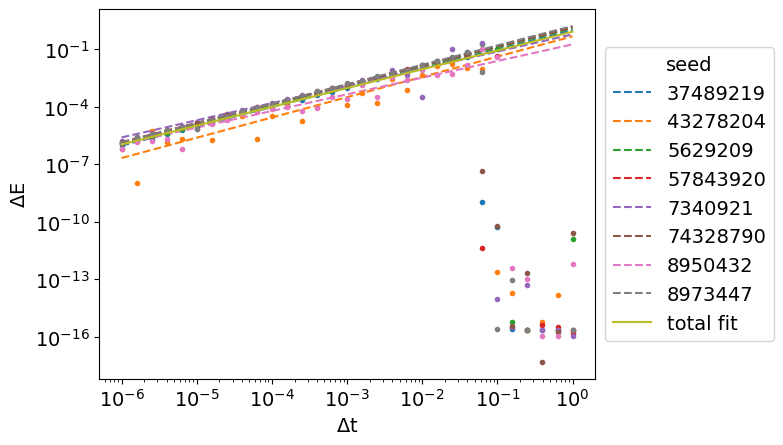

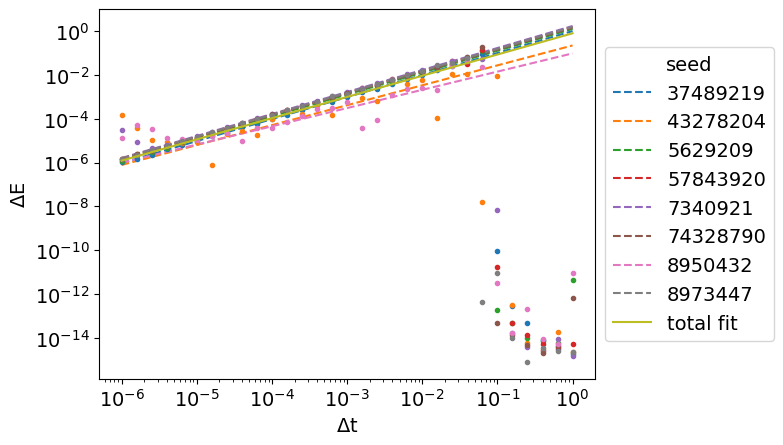

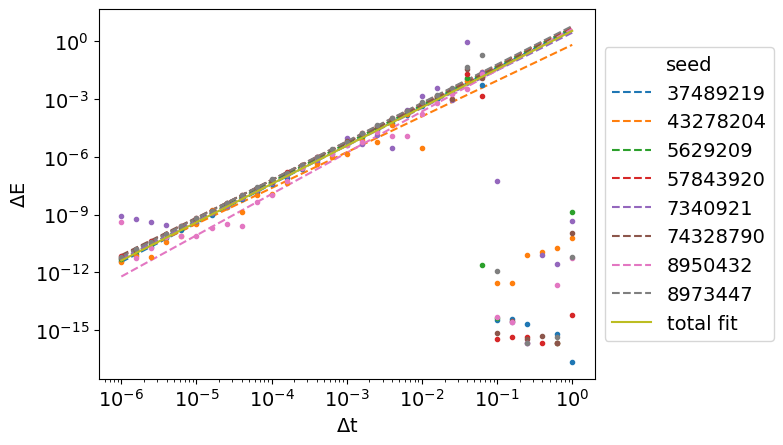

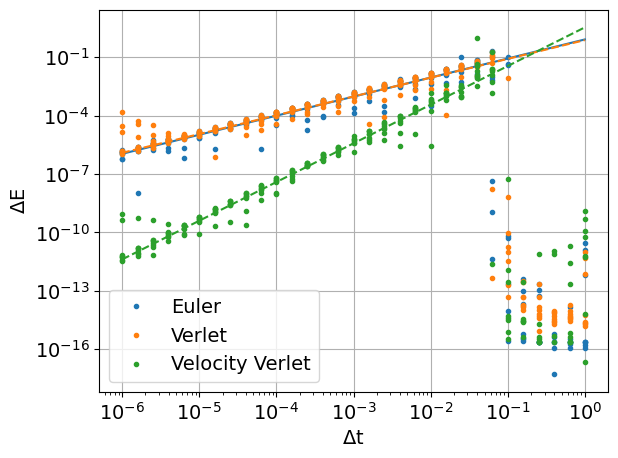

In [137]:
def make_figure(data: pd.DataFrame, fit: pd.DataFrame):
    seeds = data.columns.to_numpy()
    dt = data.index.to_numpy()
    dt_sort = np.sort(dt)
    plt.figure()
    for index, seed in enumerate(seeds):
        fit_values = fit.loc[seed]
        plt.loglog(dt_sort, (10**fit_values['b'])*(dt_sort**fit_values['a']), f'C{index}--', label=seed)
    for index, seed in enumerate(seeds):
        plt.loglog(dt, data[seed], f'C{index}.')
    fit_values = fit.loc['total']
    plt.loglog(dt, (10**fit_values['b'])*(dt**fit_values['a']), f'C{index+1}', label='total fit')
    plt.legend(title='seed', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(r'$\Delta$t')
    plt.ylabel(r'$\Delta$E')


make_figure(data_euler_3, fit_euler_3)
plt.savefig(imloc('5_euler.png'))
plt.show()

make_figure(data_basic_3, fit_basic_3)
plt.savefig(imloc('5_basic.png'))
plt.show()

make_figure(data_velocity_3, fit_velocity_3)
plt.savefig(imloc('5_velocity.png'))
plt.show()

plt.figure()
l1 = plt.loglog(data_euler_3.index.to_numpy(), data_euler_3.to_numpy(), 'C0.', label='Euler')
plt.loglog(data_euler_3.index.to_numpy(), 10 ** fit_euler_3.loc['total']['b'] * data_euler_3.index.to_numpy() ** fit_euler_3.loc['total']['a'], 'C0-')
l2 = plt.loglog(data_basic_3.index.to_numpy(), data_basic_3.to_numpy(), 'C1.', label='Euler')
plt.loglog(data_basic_3.index.to_numpy(), 10 ** fit_basic_3.loc['total']['b'] * data_basic_3.index.to_numpy() ** fit_basic_3.loc['total']['a'], 'C1--')
l3 = plt.loglog(data_velocity_3.index.to_numpy(), data_velocity_3.to_numpy(), 'C2.', label='Euler')
plt.loglog(data_velocity_3.index.to_numpy(), 10 ** fit_velocity_3.loc['total']['b'] * data_velocity_3.index.to_numpy() ** fit_velocity_3.loc['total']['a'], 'C2--')
plt.legend([l1[0], l2[0], l3[0]], ['Euler', 'Verlet', 'Velocity Verlet'])
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$E')
plt.grid()
plt.tight_layout()
plt.savefig(imloc('5_total.png'))
plt.show()

In [120]:
data_euler_10 = extract_data('5_deltaE_veuler_t100_p10', 20, 10)
data_basic_10 = extract_data('5_deltaE_vbasic_t100_p10', 20, 10)
data_velocity_10 = extract_data('5_deltaE_vvelocity_t100_p10', 20, 10)

zero for 100 steps		
zero for 100 steps		
zero for 100 steps		
zero for 100 steps		
zero for 100 steps		
zero for 158 steps		
zero for 251 steps		
zero for 398 steps		
100.00% done
100.00% done
zero for 1000 steps		
zero for 100 steps		
zero for 158 steps		
zero for 251 steps		
zero for 251 steps		
zero for 398 steps		
zero for 398 steps		
zero for 630 steps		
100.00% done


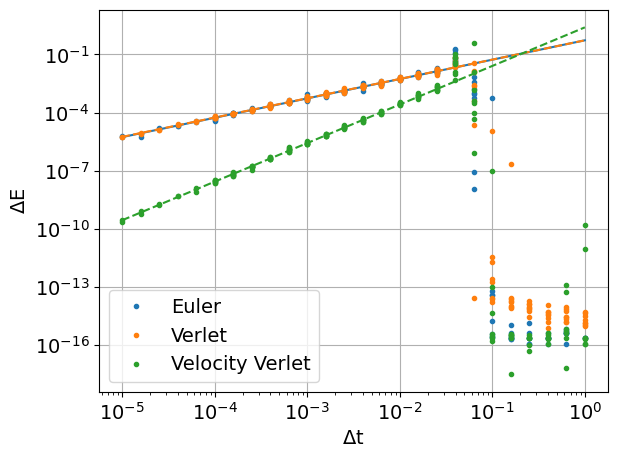

In [134]:
max_dt = 1e-2
min_dt = 1e-5
fit_euler_10 = fit(data_euler_10, max_dt)
fit_basic_10 = fit(data_basic_10, max_dt)
fit_velocity_10 = fit(data_velocity_10, max_dt, min_dt)

plt.figure()
l1 = plt.loglog(data_euler_10.index.to_numpy(), data_euler_10.to_numpy(), 'C0.', label='Euler')
plt.loglog(data_euler_10.index.to_numpy(), 10 ** fit_euler_10.loc['total']['b'] * data_euler_10.index.to_numpy() ** fit_euler_10.loc['total']['a'], 'C0-')
l2 = plt.loglog(data_basic_10.index.to_numpy(), data_basic_10.to_numpy(), 'C1.', label='Euler')
plt.loglog(data_basic_10.index.to_numpy(), 10 ** fit_basic_10.loc['total']['b'] * data_basic_10.index.to_numpy() ** fit_basic_10.loc['total']['a'], 'C1--')
l3 = plt.loglog(data_velocity_10.index.to_numpy(), data_velocity_10.to_numpy(), 'C2.', label='Euler')
plt.loglog(data_velocity_10.index.to_numpy(), 10 ** fit_velocity_10.loc['total']['b'] * data_velocity_10.index.to_numpy() ** fit_velocity_10.loc['total']['a'], 'C2--')
plt.legend([l1[0], l2[0], l3[0]], ['Euler', 'Verlet', 'Velocity Verlet'])
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$E')
plt.grid()
plt.tight_layout()
plt.savefig(imloc('5_total_10.png'))
plt.show()

zero for 1000 steps		
zero for 100 steps		
zero for 100 steps		
zero for 100 steps		
zero for 100 steps		
zero for 100 steps		
zero for 158 steps		
zero for 251 steps		
zero for 251 steps		
zero for 251 steps		
zero for 251 steps		
zero for 398 steps		
zero for 630 steps		
zero for 630 steps		
zero for 630 steps		
100.00% done
100.00% done
zero for 1000 steps		
zero for 1000 steps		
zero for 100 steps		
zero for 251 steps		
zero for 398 steps		
zero for 398 steps		
zero for 398 steps		
zero for 630 steps		
zero for 630 steps		
100.00% done


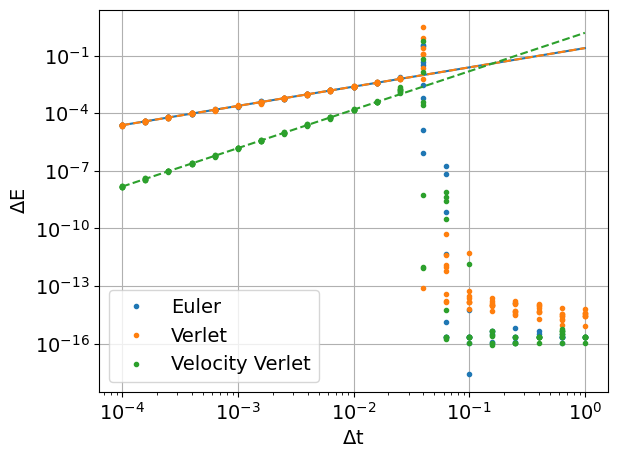

In [159]:
data_euler_50 = extract_data('5_deltaE_veuler_t100_p50', 20, 50)
data_basic_50 = extract_data('5_deltaE_vbasic_t100_p50', 20, 50)
data_velocity_50 = extract_data('5_deltaE_vvelocity_t100_p50', 20, 50)
max_dt = 2e-2
min_dt = 1e-6
fit_euler_50 = fit(data_euler_50, max_dt)
fit_basic_50 = fit(data_basic_50, max_dt)
fit_velocity_50 = fit(data_velocity_50, max_dt, min_dt)

plt.figure()
l1 = plt.loglog(data_euler_50.index.to_numpy(), data_euler_50.to_numpy(), 'C0.', label='Euler')
plt.loglog(data_euler_50.index.to_numpy(),
           10 ** fit_euler_50.loc['total']['b'] * data_euler_50.index.to_numpy() ** fit_euler_50.loc['total']['a'],
           'C0-')
l2 = plt.loglog(data_basic_50.index.to_numpy(), data_basic_50.to_numpy(), 'C1.', label='Euler')
plt.loglog(data_basic_50.index.to_numpy(),
           10 ** fit_basic_50.loc['total']['b'] * data_basic_50.index.to_numpy() ** fit_basic_50.loc['total']['a'],
           'C1--')
l3 = plt.loglog(data_velocity_50.index.to_numpy(), data_velocity_50.to_numpy(), 'C2.', label='Euler')
plt.loglog(data_velocity_50.index.to_numpy(),
           10 ** fit_velocity_50.loc['total']['b'] * data_velocity_50.index.to_numpy() ** fit_velocity_50.loc['total'][
               'a'], 'C2--')
plt.legend([l1[0], l2[0], l3[0]], ['Euler', 'Verlet', 'Velocity Verlet'])
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$E')
plt.grid()
plt.tight_layout()
plt.savefig(imloc('5_total_50.png'))
plt.show()

# 7

In [149]:
result = Simulation.run(t=1e2, steps=int(1e6), particles=3, save_every=10, boundary_condition=True, verlet_type='velocity', seed=584390)
result.save(dataloc('7_3.npz'))

100% done


In [150]:
result = Simulation.run(t=1e2, steps=int(1e6), particles=2, save_every=10, boundary_condition=True, verlet_type='velocity', seed=584390)
result.save(dataloc('7_2.npz'))

100% done


In [140]:
result = Simulation.run(t=1e2, steps=int(1e6), particles=10, save_every=10, boundary_condition=True, verlet_type='velocity', seed=584390)
result.save(dataloc('7_10.npz'))

100% done


In [146]:
result = Simulation.run(t=1e2, steps=int(1e6), particles=50, save_every=10, boundary_condition=True, verlet_type='velocity', seed=584390)
result.save(dataloc('7_50.npz'))

100% done


In [8]:
t = 1e2
steps = int(1e6)
np.random.seed(584391)
result = Simulation.run(t=t, steps=steps, particles=2, save_every=10, boundary_condition=True, verlet_type='velocity')
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

np.random.seed(584391)
result = Simulation.run(t=t, steps=steps, particles=2, save_every=10, boundary_condition=False, verlet_type='velocity')
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

np.random.seed(584391)
result = Simulation.run(t=t, steps=steps, particles=2, save_every=10, boundary_condition=True, verlet_type='basic')
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

np.random.seed(584391)
result = Simulation.run(t=t, steps=steps, particles=2, save_every=10, boundary_condition=False, verlet_type='basic')
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

20% done

KeyboardInterrupt: 

Kinetic std: 1.03e-01
Potential std: 1.03e-01
Energy std: 1.60e-04


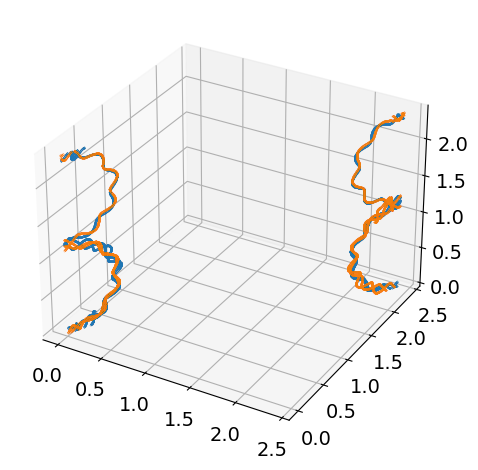

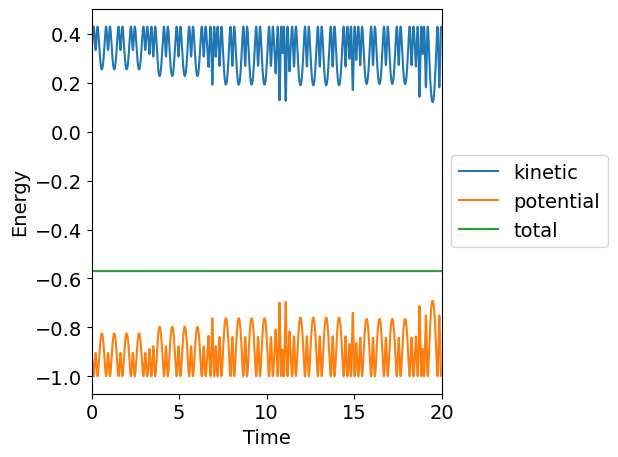

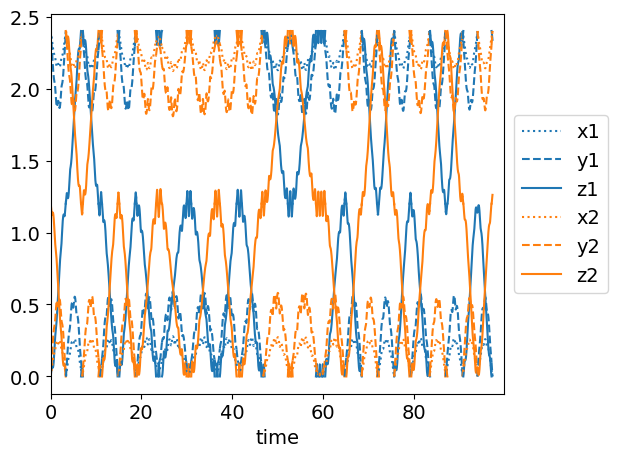

In [158]:
result = Simulation.read(dataloc('7_2.npz'))
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

ax = plt.figure().add_subplot(projection='3d')
max_index = int(len(result.total_particle_locations[:, 0, 0])/4)
for i in range(len(result.total_particle_locations[0])):
    ax.plot(result.total_particle_locations[:max_index, i, 0],
            result.total_particle_locations[:max_index, i, 1],
            result.total_particle_locations[:max_index, i, 2], '.', markersize=0.1)

plt.tight_layout()
plt.savefig(imloc('7_2_3Dplot.png'))

result.plot_energy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(result.save_times[0], 20)
plt.tight_layout()
plt.savefig(imloc('7_2_energy.png'))
loc = result.total_particle_locations

indexes = set([])
for i in range(len(result.total_particle_locations[0])):
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 0])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 1])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 2])) > 1)[:, 0] + 1
    indexes.update(set(index))
indexes = sorted(list(indexes))

plt.figure()
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 0], 'C0', linestyle='dotted', label='x1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 1], 'C0--', label='y1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 2], 'C0-', label='z1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 0], 'C1', linestyle='dotted', label='x2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 1], 'C1--', label='y2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 2], 'C1-', label='z2')
for index1, index2 in zip(indexes[1:-1], indexes[2:]):
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 0], 'C0', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 1], 'C0--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 2], 'C0-')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 0], 'C1', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 1], 'C1--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 2], 'C1-')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('7_2_coordinates.png'))
plt.show()

Kinetic std: 1.13e+00
Potential std: 1.13e+00
Energy std: 9.29e-05


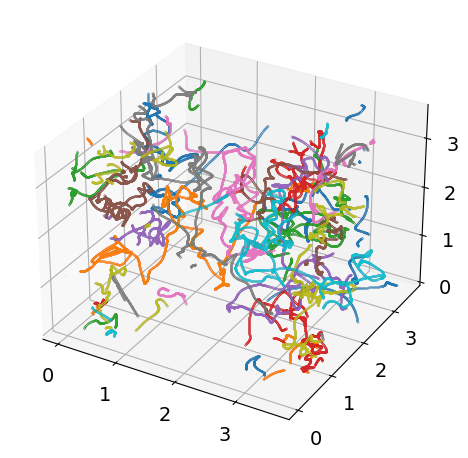

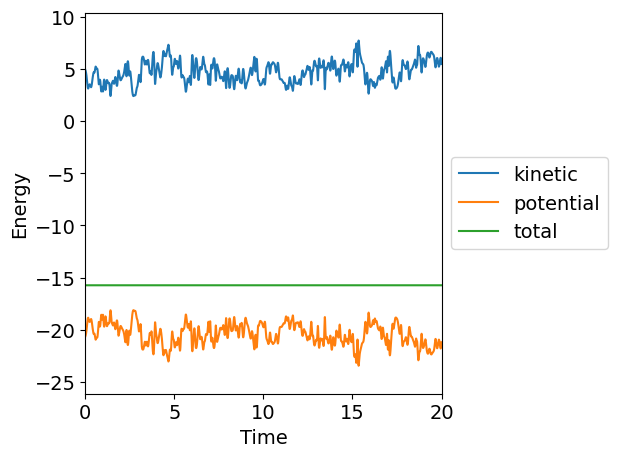

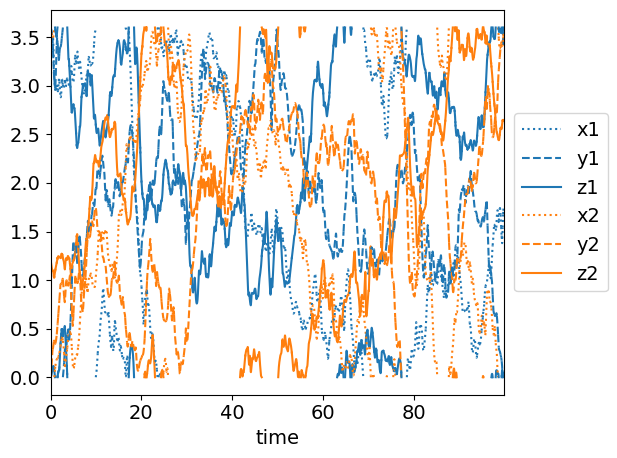

In [154]:
result = Simulation.read(dataloc('7_10.npz'))
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

ax = plt.figure().add_subplot(projection='3d')
max_index = int(len(result.total_particle_locations[:, 0, 0]) / 4)
for i in range(len(result.total_particle_locations[0])):
    ax.plot(result.total_particle_locations[:max_index, i, 0],
            result.total_particle_locations[:max_index, i, 1],
            result.total_particle_locations[:max_index, i, 2], '.', markersize=0.1)

plt.tight_layout()
plt.savefig(imloc('7_10_3Dplot.png'))

result.plot_energy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(result.save_times[0], 20)
plt.tight_layout()
plt.savefig(imloc('7_10_energy.png'))
loc = result.total_particle_locations

indexes = set([])
for i in range(len(result.total_particle_locations[0])):
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 0])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 1])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 2])) > 1)[:, 0] + 1
    indexes.update(set(index))
indexes = sorted(list(indexes))

plt.figure()
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 0], 'C0', linestyle='dotted',
         label='x1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 1], 'C0--', label='y1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 2], 'C0-', label='z1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 0], 'C1', linestyle='dotted',
         label='x2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 1], 'C1--', label='y2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 2], 'C1-', label='z2')
for index1, index2 in zip(indexes[1:-1], indexes[2:]):
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 0], 'C0', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 1], 'C0--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 2], 'C0-')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 0], 'C1', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 1], 'C1--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 2], 'C1-')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('7_10_coordinates.png'))
plt.show()

Kinetic std: 3.55e-01
Potential std: 3.55e-01
Energy std: 5.11e-04


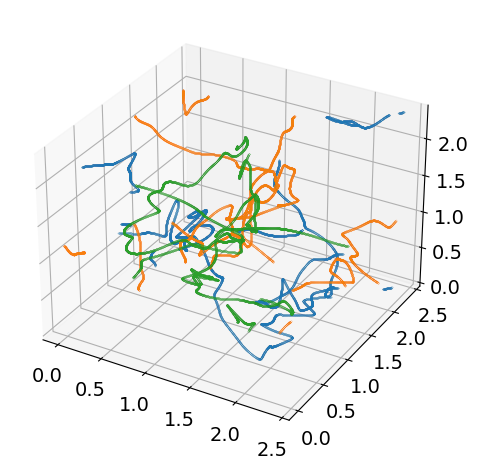

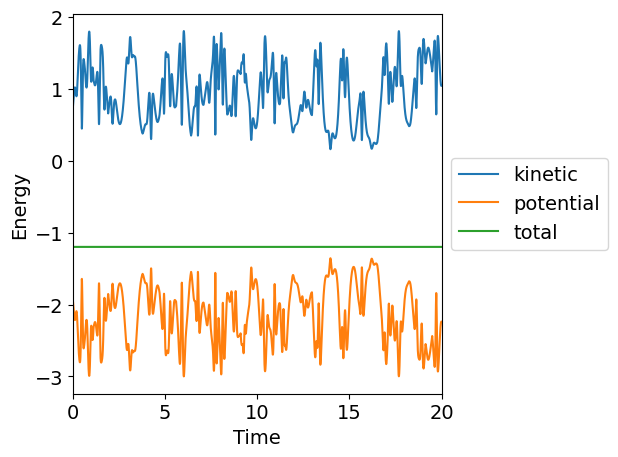

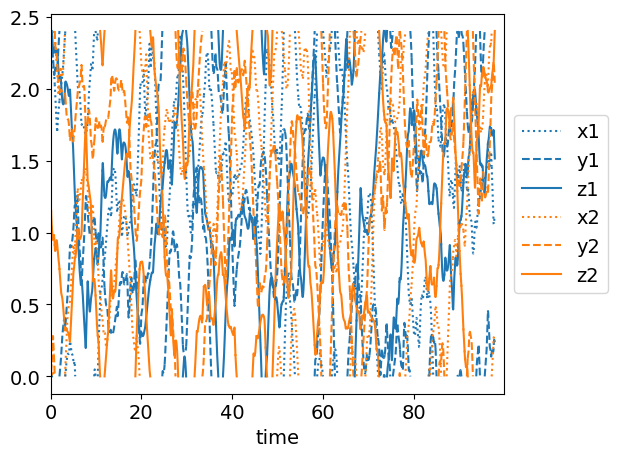

In [155]:
result = Simulation.read(dataloc('7_3.npz'))
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

ax = plt.figure().add_subplot(projection='3d')
max_index = int(len(result.total_particle_locations[:, 0, 0]) / 4)
for i in range(len(result.total_particle_locations[0])):
    ax.plot(result.total_particle_locations[:max_index, i, 0],
            result.total_particle_locations[:max_index, i, 1],
            result.total_particle_locations[:max_index, i, 2], '.', markersize=0.1)

plt.tight_layout()
plt.savefig(imloc('7_3_3Dplot.png'))

result.plot_energy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(result.save_times[0], 20)
plt.tight_layout()
plt.savefig(imloc('7_3_energy.png'))
loc = result.total_particle_locations

indexes = set([])
for i in range(len(result.total_particle_locations[0])):
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 0])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 1])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 2])) > 1)[:, 0] + 1
    indexes.update(set(index))
indexes = sorted(list(indexes))

plt.figure()
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 0], 'C0', linestyle='dotted',
         label='x1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 1], 'C0--', label='y1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 2], 'C0-', label='z1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 0], 'C1', linestyle='dotted',
         label='x2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 1], 'C1--', label='y2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 2], 'C1-', label='z2')
for index1, index2 in zip(indexes[1:-1], indexes[2:]):
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 0], 'C0', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 1], 'C0--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 2], 'C0-')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 0], 'C1', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 1], 'C1--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 2], 'C1-')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('7_3_coordinates.png'))
plt.show()

Kinetic std: 4.21e+00
Potential std: 4.21e+00
Energy std: 1.26e-04


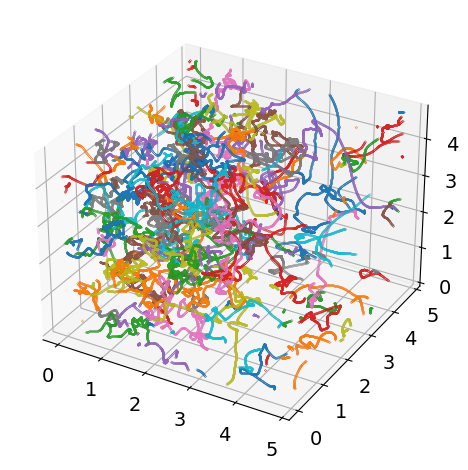

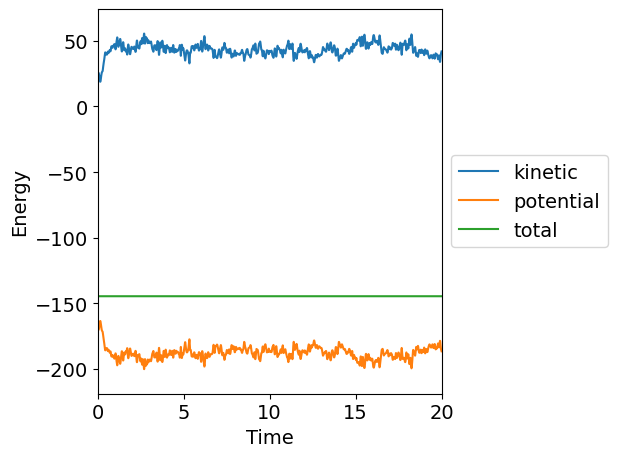

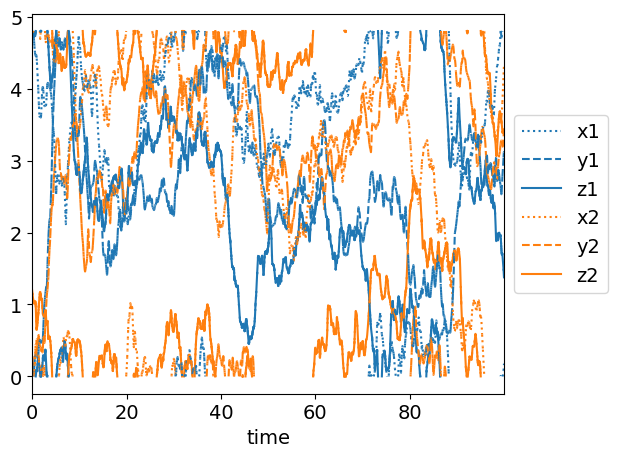

In [157]:
result = Simulation.read(dataloc('7_50.npz'))
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

ax = plt.figure().add_subplot(projection='3d')
max_index = int(len(result.total_particle_locations[:, 0, 0]) / 10)
for i in range(len(result.total_particle_locations[0])):
    ax.plot(result.total_particle_locations[:max_index, i, 0],
            result.total_particle_locations[:max_index, i, 1],
            result.total_particle_locations[:max_index, i, 2], '.', markersize=0.1)

plt.tight_layout()
plt.savefig(imloc('7_50_3Dplot.png'))

result.plot_energy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(result.save_times[0], 20)
plt.tight_layout()
plt.savefig(imloc('7_50_energy.png'))
loc = result.total_particle_locations

indexes = set([])
for i in range(len(result.total_particle_locations[0])):
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 0])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 1])) > 1)[:, 0] + 1
    indexes.update(set(index))
    index = np.argwhere(abs(np.diff(result.total_particle_locations[:, i, 2])) > 1)[:, 0] + 1
    indexes.update(set(index))
indexes = sorted(list(indexes))

plt.figure()
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 0], 'C0', linestyle='dotted',
         label='x1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 1], 'C0--', label='y1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 0, 2], 'C0-', label='z1')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 0], 'C1', linestyle='dotted',
         label='x2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 1], 'C1--', label='y2')
plt.plot(result.save_times[indexes[0]:indexes[1]], loc[indexes[0]:indexes[1], 1, 2], 'C1-', label='z2')
for index1, index2 in zip(indexes[1:-1], indexes[2:]):
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 0], 'C0', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 1], 'C0--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 0, 2], 'C0-')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 0], 'C1', linestyle='dotted')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 1], 'C1--')
    plt.plot(result.save_times[index1:index2], loc[index1:index2, 1, 2], 'C1-')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('7_50_coordinates.png'))
plt.show()